# Pymaceuticals

In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
drug_data = pd.read_csv("mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("clinicaltrial_data.csv")

In [3]:
# combine
combined_data = pd.merge(clinical_trial_data, drug_data, on='Mouse ID', how="left")

# display
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# mean tumor volume
mean_tumor_volume = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
mean_tumor_volume

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [5]:
# convert to dataframe
tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()

In [6]:
#display
tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# standard error
sem_tumor_volume = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
sem_tumor_volume

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
           25           0.881642
           30           0.934460
           35           1.052241
           40           1.223608
           45           1.223977
Ceftamin   0            0.000000
           5            0.164505
           10           0.236144
           15           0.332053
           20           0.359482
           25           0.439356
           30           0.490620
           35           0.692248
           40           0.708505
           45           0.902358
Infubinol  0            0.000000
           5            0.235102
           10           0.282346
           15           0.357705
           20           0.476210
           25           0.550315
           30           0.631061
           35           0.984155
           40           1.055220
           45         

In [8]:
# convert to dataframe
sem_tumor_volume_df = pd.DataFrame(sem_tumor_volume).reset_index()

In [9]:
# display
sem_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# reformat
tumor_volume_df = tumor_volume_df.pivot_table('Tumor Volume (mm3)', 'Timepoint','Drug')

In [11]:
# display
tumor_volume_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
# reformat sems
sem_tumor_volume_plot_df = sem_tumor_volume_df.pivot_table('Tumor Volume (mm3)', 'Timepoint','Drug')

In [13]:
# get drugs of interest
volumes_to_plot = tumor_volume_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
volumes_to_plot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [14]:
sems_tv_to_plot = sem_tumor_volume_plot_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
sems_tv_to_plot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


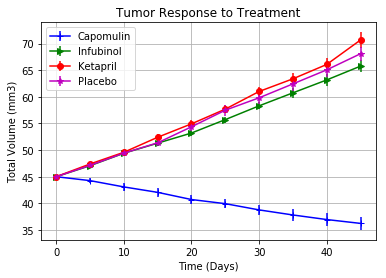

In [15]:
# generate plot with error bars
markers=['+', '>', 'o', '*']
colors=['b', 'g', 'r', 'm']
i=0

for drug in volumes_to_plot.columns:
    plt.errorbar(volumes_to_plot.index, volumes_to_plot[drug], yerr=sems_tv_to_plot[drug], marker=markers[i], color=colors[i])
    i+=1
    
plt.grid()
plt.xlabel('Time (Days)')
plt.ylabel('Total Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.legend()

# save
plt.savefig('tumor-response')

# show
plt.show()

### Trends:
### - Of the 4, Capomulin is the only successful drug where tumor size is substantially decreasing over time
### - The other 2 drugs are pretty ineffective - very similar to placebo
### - Infubinol is slightly better
### - Tumor growth is generally linear over time


## Metastatic Response to Treatment

In [16]:
# mean metastatic response
metastatic_response = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
metastatic_response

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Ceftamin   0            0.000000
           5            0.380952
           10           0.600000
           15           0.789474
           20           1.111111
           25           1.500000
           30           1.937500
           35           2.071429
           40           2.357143
           45           2.692308
Infubinol  0            0.000000
           5            0.280000
           10           0.666667
           15           0.904762
           20           1.050000
           25           1.277778
           30           1.588235
           35           1.666667
           40           2.100000
           45         

In [17]:
# convert to dataframe
metastatic_sites_df = pd.DataFrame(metastatic_response).reset_index()
metastatic_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [18]:
# reformat
met_plot_df = metastatic_sites_df.pivot_table('Metastatic Sites', 'Timepoint','Drug')
met_plot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [19]:
# standard error
sem_met = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
sem_met

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
           25           0.181818
           30           0.172944
           35           0.169496
           40           0.175610
           45           0.202591
Ceftamin   0            0.000000
           5            0.108588
           10           0.152177
           15           0.180625
           20           0.241034
           25           0.258831
           30           0.249479
           35           0.266526
           40           0.289128
           45           0.286101
Infubinol  0            0.000000
           5            0.091652
           10           0.159364
           15           0.194015
           20           0.234801
           25           0.265753
           30           0.227823
           35           0.224733
           40           0.314466
           45         

In [20]:
# convert to dataframe
sem_met_df = pd.DataFrame(sem_met).reset_index()
sem_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [21]:
# reformat sems
sem_met_plot_df = sem_met_df.pivot_table('Metastatic Sites', 'Timepoint','Drug')
sem_met_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [22]:
# get drugs of interest
mets_to_plot = met_plot_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
sem_mets_to_plot = sem_met_plot_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

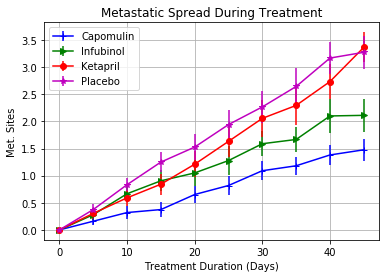

In [23]:
# generate plot with error bars
markers=['+', '>', 'o', '*']
colors=['b', 'g', 'r', 'm']
i=0

for drug in mets_to_plot.columns:
    plt.errorbar(mets_to_plot.index, mets_to_plot[drug], yerr=sem_mets_to_plot[drug], marker=markers[i], color=colors[i])
    i+=1
    
plt.grid()
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend()

# save
plt.savefig('metastatic-response')

plt.show()

### Trends:
### - Capomulin has the smallest number of metastatic sites spreading over time
### - The other 2 drugs are better than placebo

## Survival Rates

In [24]:
# count of mice
count_of_mice = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].count()
count_of_mice


Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Ceftamin   0            25
           5            21
           10           20
           15           19
           20           18
           25           18
           30           16
           35           14
           40           14
           45           13
Infubinol  0            25
           5            25
           10           21
           15           21
           20           20
           25           18
           30           17
           35           12
           40           10
           45            9
                        ..
Ramicane   0            25
           5            25
           10           24
           15           24
           20           23
       

In [25]:
# convert to dataframe
count_df = pd.DataFrame(count_of_mice).reset_index()
count_df = count_df.rename(columns = {'Metastatic Sites' : 'Mouse Count'})
count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
# reformat
count_plot_df = count_df.pivot_table('Mouse Count', 'Timepoint','Drug')
count_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [27]:
# get drugs of interest
counts_to_plot = count_plot_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

In [28]:
# counts before treatment
initial_counts = counts_to_plot.iloc[0]
initial_counts

Drug
Capomulin    25
Infubinol    25
Ketapril     25
Placebo      25
Name: 0, dtype: int64

In [29]:
# get percents df
percent_survival_df = (counts_to_plot/initial_counts)*100
percent_survival_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


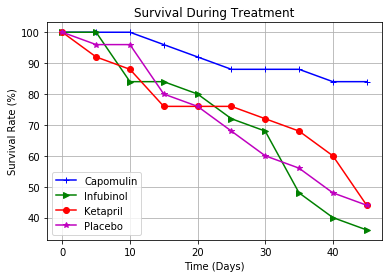

In [30]:
# generate plot with error bars
markers=['+', '>', 'o', '*']
colors=['b', 'g', 'r', 'm']
i=0

for drug in counts_to_plot.columns:
    plt.plot(percent_survival_df.index, percent_survival_df[drug], marker=markers[i], color=colors[i])
    i+=1
    
plt.grid()
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.legend()

# save
plt.savefig('percent_survival')

plt.show()

### Trends:
### - Capuminol has the best survival rate by far, with almost twice as many surviving mice as the other drugs

## Summary Bar Graph

In [31]:
# revisit tumor volume df
tumor_volume_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [32]:
# get percent change
pct_change= pd.Series()
for drug in tumor_volume_df.columns:
    first = list(tumor_volume_df[drug])[0]
    last = list(tumor_volume_df[drug])[-1]
    pct_change = pct_change.set_value(drug, (last-first)*100/first )
   
pct_change

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [33]:
# get drugs of interest into tuple
drugs = ('Capomulin', 'Infubinol', 'Ketapril','Placebo')
pct_change_tuple = (pct_change['Capomulin'],pct_change['Infubinol'],pct_change['Ketapril'],pct_change['Placebo'])

In [34]:
# splice data
passing = tuple([i for i in pct_change_tuple if i <= 0])
failing = tuple([i for i in pct_change_tuple if i > 0])

passing_drugs = tuple([i for i in drugs if pct_change_tuple[drugs.index(i)] <= 0])
failing_drugs = tuple([i for i in drugs if pct_change_tuple[drugs.index(i)] > 0])

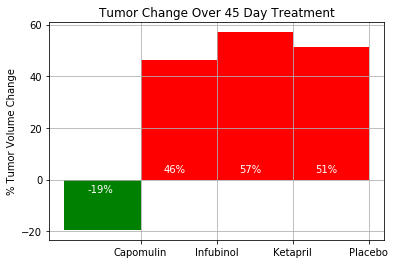

In [35]:
# bar graph
plt.bar(passing_drugs, passing, width=-1, align='edge', color='g')
plt.bar(failing_drugs, failing, width=-1, align='edge', color='r')
plt.grid()
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.yticks(range(-20,80,20))

# define function for percent annotations
def add_label(drug):
    annotation = '{:.0f}%'.format(pct_change_tuple[drugs.index(drug)])
    xloc = drugs.index(drug)-.7
    if drug in passing_drugs:
        yloc=-5
    else:
        yloc=3
    plt.annotate(annotation, [xloc,yloc], color='w')

# call on function for each drug
for drug in drugs:
    add_label(drug) 

# save
plt.savefig('change_summary')

# show
plt.show()

### Summary:
### - Capomulin is the only successful drug in decreasing tumor size over the treatment period. Infubinol and Ketapril are about as good as placebo.
